# Assignment 3: Car's price prediction 
#### Name: Ashmita Phuyal(st124454)

## 1. Import libraries

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import warnings
import ppscore as pps
import time
warnings.filterwarnings('ignore')

## 2. Load data

In [79]:
df = pd.read_csv('Dataset/Cars.csv')
#To ensure that picking the right data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [80]:

print(df.shape)
#Check the statistical info


(8128, 13)


In [81]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [82]:
#Check Dtype for all columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [83]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 3. Exporatory Data Analysis (EDA)

### 3.1 EDA

#### 3.1.1 Mapping feature "owner" using the label encoder.
The catergorical features have to be encoded before doing the analysis later on.

In [84]:
# Find unique vaules in df.owner
print(np.unique(df.owner))
#Label encoder
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
encoded_owner = labelEncoder.fit_transform(df['owner'])
# replacing the owner feature
df['owner']= encoded_owner
# Check that owner are already mapped
print(np.unique(df.owner))

['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']
[0 1 2 3 4]


In [85]:
# Check the 'owner' feature
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.2 Remove all rows with CNG and LPG in feature "fuel"

In [86]:
# Check elements in feature 'fuel' and the amount of rows before removing
print(np.unique(df.fuel))
print(df.shape)
# Remove elements "CNG" and "LPG"
df.drop(df[df.fuel == 'CNG'].index, inplace=True)
df.drop(df[df.fuel == 'LPG'].index, inplace=True)

['CNG' 'Diesel' 'LPG' 'Petrol']
(8128, 13)


In [87]:
# Double check
print(np.unique(df.fuel))
print(df.shape)

['Diesel' 'Petrol']
(8033, 13)


#### 3.1.3 Remove “kmpl” from feature "mileage" and convert the column to numerical type

In [88]:
# Replace ' kmpl' with ''
df.mileage= (df['mileage'].str.replace(' kmpl', '')).astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.4 Remove “CC” from feature "engine" and convert the column to numerical type

In [89]:
# Replace ' CC' with ''
df.engine= (df['engine'].str.replace(' CC', '')).astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.5 Remove “bhp” from feature "max_power" and convert the column to numerical type

In [90]:
# Replace ' bhp' with ''
df.max_power= (df['max_power'].str.replace(' bhp', '')).astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.6 For the feature brand, take only the first word and remove the rest

In [91]:
df.name = df.name.str.split(' ').str[0]
# Change 'name' to 'brand'
df.rename(columns ={"name":"brand"}, inplace = True)
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


#### 3.1.7 Drop the feature 'torque'

In [92]:
del df['torque']
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


#### 3.1.8 Delete all row that related to "Test Drive Cars"

In [93]:
#Check the rows before deleting
print(df.shape)
#Delete
df.drop(df[df.owner == 3].index, inplace=True)
#Double check the result
print(np.unique(df.owner))
print(df.shape)

(8033, 12)
[0 1 2 4]
(8028, 12)


#### Cleaned Data

In [94]:
# Check the clean data
df.head()
#saved for later
df_original = df.copy()

### 3.2 Univariate analyis
#### 3.2.1 countplot

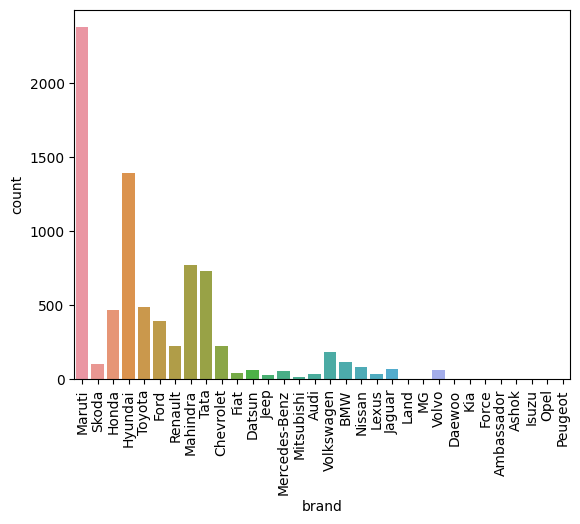

In [95]:
# Check the occurance in categorical feature 'brand'
sns.countplot(data = df, x = 'brand')
plt.xticks(rotation = 'vertical')
plt.show()

#### 3.2.2 Distribution plot

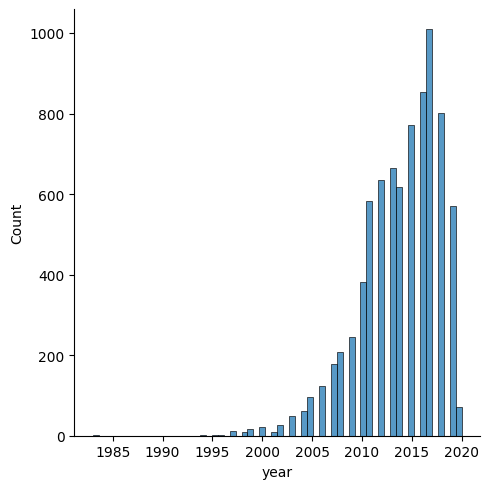

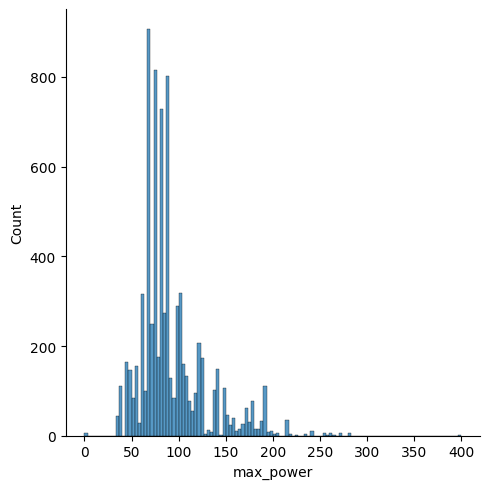

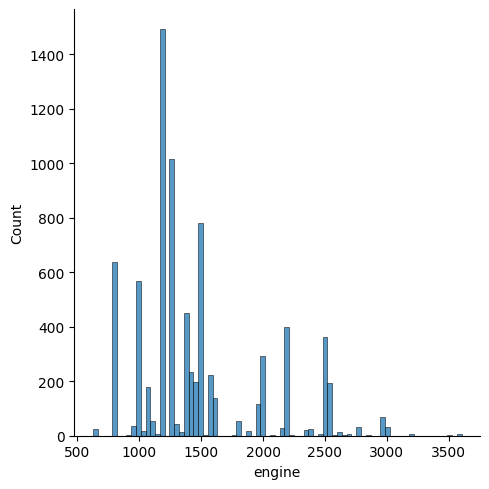

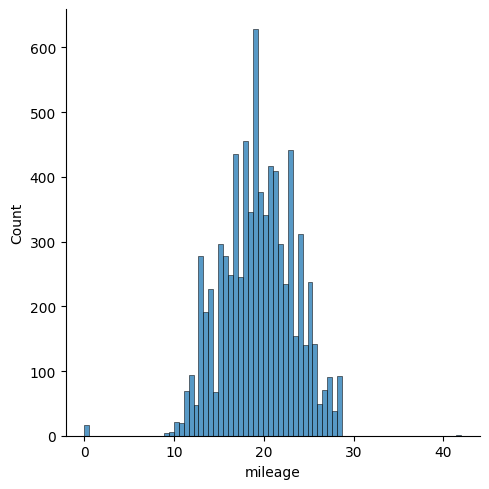

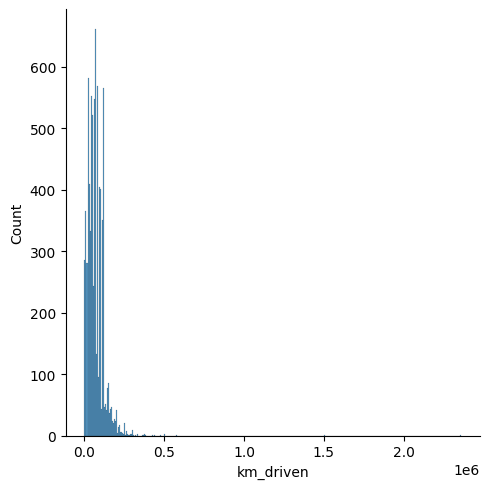

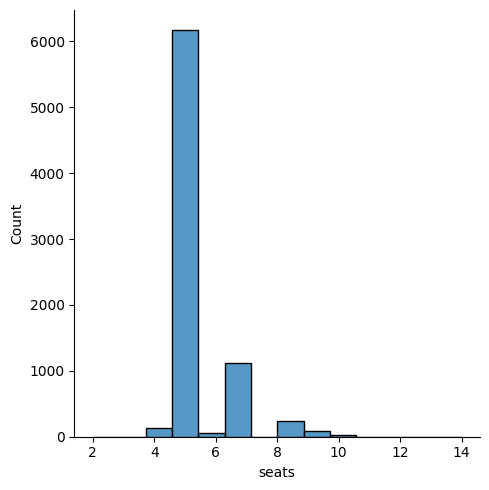

In [96]:
# Plotting the distribution of all numerical feature.ChildProcessError
sns.displot(data = df, x = 'year')
sns.displot(data = df, x = 'max_power')
sns.displot(data = df, x = 'engine')
sns.displot(data = df, x = 'mileage') 
sns.displot(data = df, x = 'km_driven')
sns.displot(data = df, x = 'seats')

### 3.3 Multivariate analysis
#### 3.3.1 Box plot

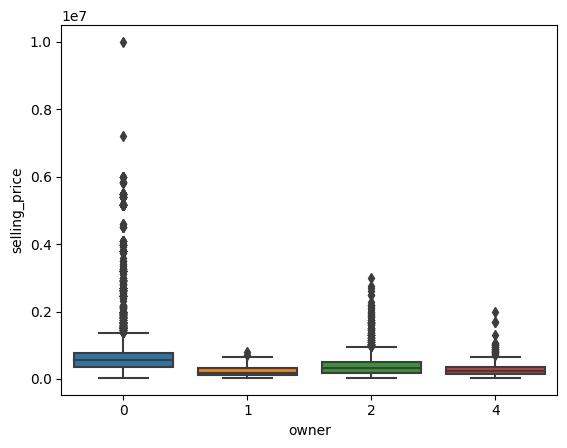

In [97]:
# Check the box plot of owner
sns.boxplot(x = df["owner"], y = df["selling_price"])
plt.show()

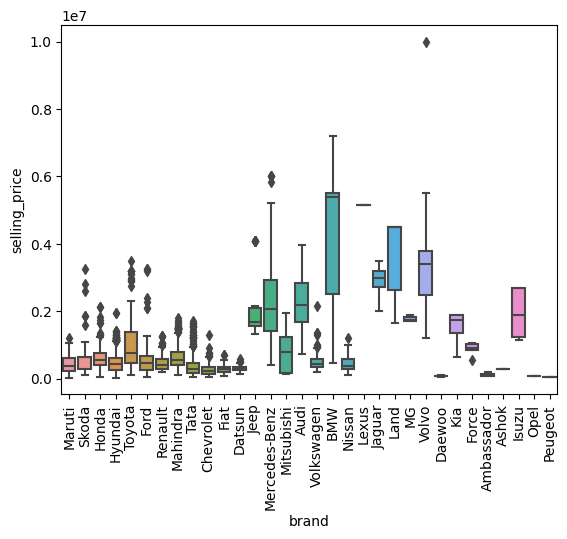

In [21]:
# Check the box plot of brand
sns.boxplot(x = df["brand"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')
plt.show()

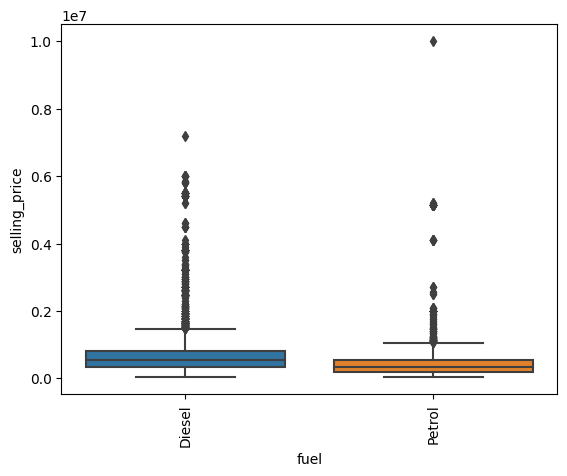

In [22]:
# Check the box plot of fuel
sns.boxplot(x = df["fuel"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')
plt.show()

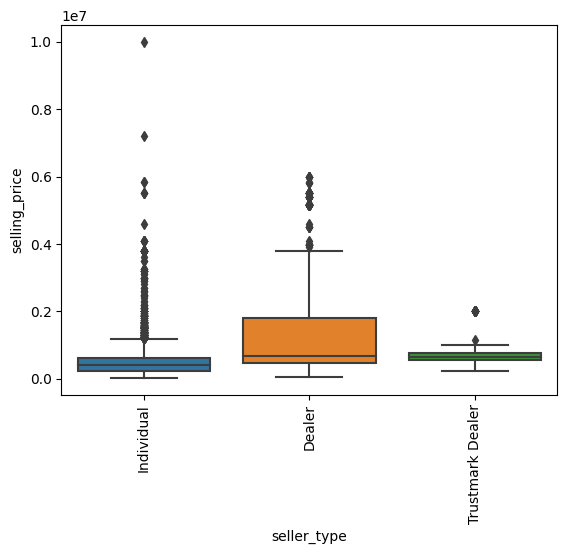

In [23]:
# Check the box plot of seller_type
sns.boxplot(x = df["seller_type"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')
plt.show()

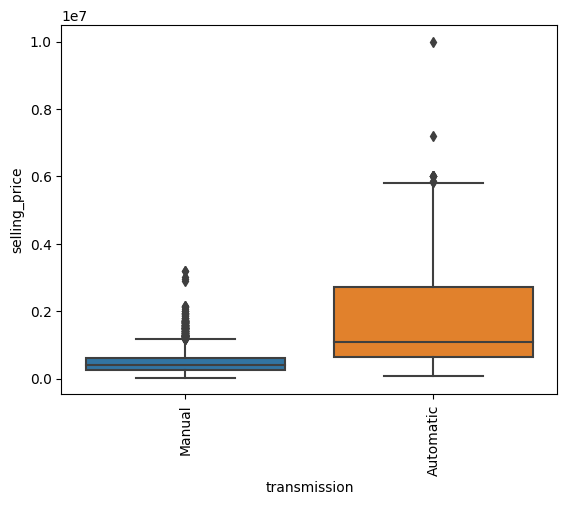

In [24]:
# Check the box plot of transmission
sns.boxplot(x = df["transmission"], y = df["selling_price"])
plt.xticks(rotation = 'vertical')
plt.show()

#### Encoding

In [25]:
# Checking uniques of all categorical features
print(np.unique(df.brand))
print(np.unique(df.fuel))
print(np.unique(df.seller_type))
print(np.unique(df.transmission))

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']
['Diesel' 'Petrol']
['Dealer' 'Individual' 'Trustmark Dealer']
['Automatic' 'Manual']


In [26]:
# For brand that has a lot of category, the one-hot encoder will be used.
dummy_variables = pd.get_dummies(df['brand'])
df = pd.concat([df, dummy_variables], axis=1)
df.drop(columns='brand',inplace=True)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197.0,82.85,...,False,False,False,False,False,False,False,False,False,False
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493.0,110.00,...,False,False,False,False,False,False,False,False,False,False
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248.0,73.90,...,False,False,False,False,False,False,False,False,False,False
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396.0,70.00,...,False,False,False,False,False,False,True,False,False,False


In [27]:
# For others feature use the label encoder is fine.
encoded_seller_type = labelEncoder.fit_transform(df['seller_type'])
encoded_transmission = labelEncoder.fit_transform(df['transmission']) 
encoded_fuel = labelEncoder.fit_transform(df['fuel'])

df['fuel']= encoded_fuel
df['seller_type']= encoded_seller_type
df['transmission']= encoded_transmission
df.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,0,1,1,0,23.40,1248.0,74.00,...,False,False,False,False,False,False,False,False,False,False
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,False,False,False,False,False,True,False,False,False,False
2,2006,158000,140000,1,1,1,4,17.70,1497.0,78.00,...,False,False,False,False,False,False,False,False,False,False
3,2010,225000,127000,0,1,1,0,23.00,1396.0,90.00,...,False,False,False,False,False,False,False,False,False,False
4,2007,130000,120000,1,1,1,0,16.10,1298.0,88.20,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# To have nearly the same size of bins, selling price encoding will be using with a quartile cut. 
df['selling_price'] = pd.qcut(df['selling_price'], q=4, labels=False)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,1,145500,0,1,1,0,23.40,1248.0,74.00,...,False,False,False,False,False,False,False,False,False,False
1,2014,1,120000,0,1,1,2,21.14,1498.0,103.52,...,False,False,False,False,False,True,False,False,False,False
2,2006,0,140000,1,1,1,4,17.70,1497.0,78.00,...,False,False,False,False,False,False,False,False,False,False
3,2010,0,127000,0,1,1,0,23.00,1396.0,90.00,...,False,False,False,False,False,False,False,False,False,False
4,2007,0,120000,1,1,1,0,16.10,1298.0,88.20,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Check the number of vaules in each cut
df['selling_price'].value_counts()

selling_price
0    2050
1    2044
3    1991
2    1943
Name: count, dtype: int64

In [30]:
# Check the selling_price values
df['selling_price'].describe()

count    8028.000000
mean        1.482686
std         1.120974
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: selling_price, dtype: float64

#### 3.3.2 Correlation matrix
Displays the correlation coefficients between many features which useful for features selections.

In [31]:
#Create 2 dataframes to used with pps and heatmap(Just in case that their are the features that I want to drop.)
df_corr = df.drop(columns=['selling_price','Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'])
df_pss=df.drop(columns=['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'])

<Axes: >

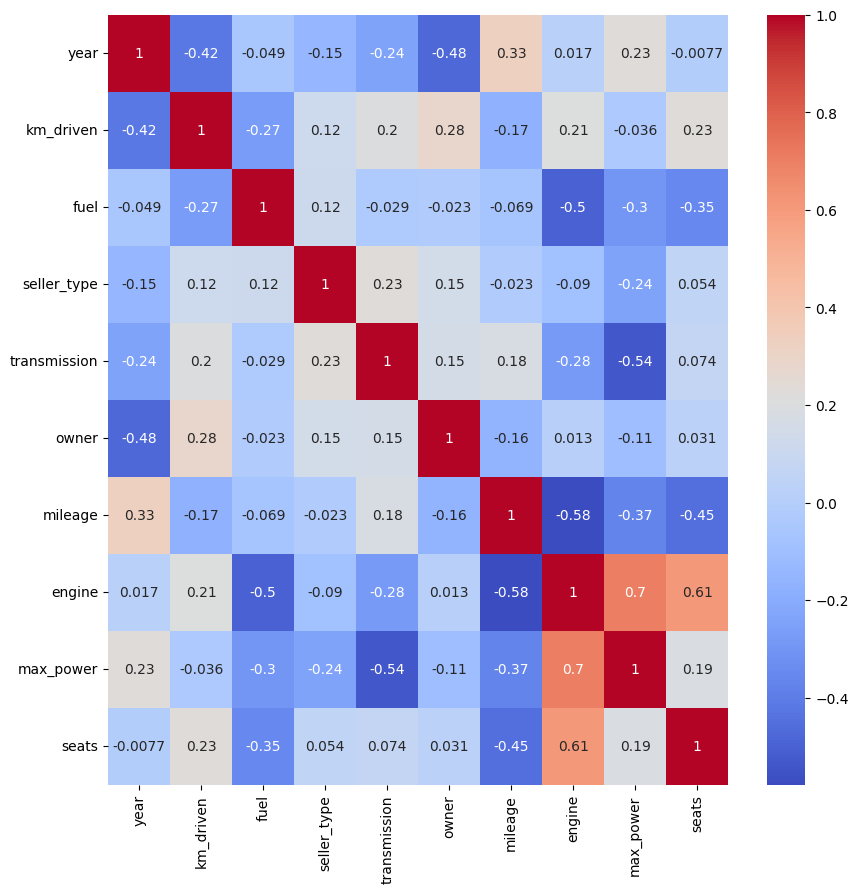

In [32]:
#Create the correlation matrix
plt.figure(figsize=(10,10))
# Plot heatmap
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")

#### 3.3.3 Predictive Power Score
Predictive Power Score provides a way to quantify how well individual features can predict the target variable.

<Axes: xlabel='x', ylabel='y'>

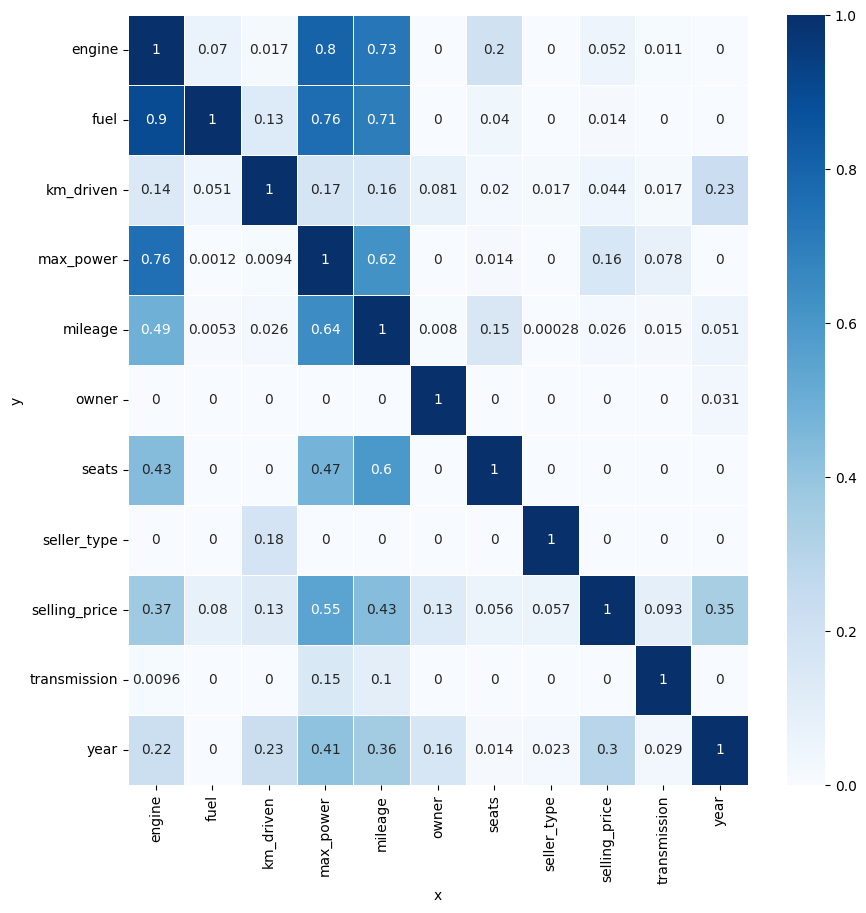

In [33]:
matrix_df_pps = pps.matrix(df_pss)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(10,10))
sns.heatmap(matrix_df_pps, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 4. Feature Engineering (Skipped)

## 5. Feature Selection
From EDA part, the features that have been selected is 'max_power', 'year', 'fuel', and all of brand features. Although the 'engine' and 'mileage' have great pps score, both feature are highly correlate with other features which are 'max_power' and 'year'.

### 5.1 Train Test split

In [34]:
# Check the columns of clean data
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [35]:
#x is our strong features
X = df[['max_power', 'year','fuel','engine']]
# y is our target
y = df['selling_price']

In [36]:
#Check the selling price
df['selling_price']

0       1
1       1
2       0
3       0
4       0
       ..
8123    1
8124    0
8125    1
8126    1
8127    1
Name: selling_price, Length: 8028, dtype: int64

In [37]:
# Train-test splitting using train_test_split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7040)

## 6. Preprocessing
Preprocessing is a crucial stage in data preparation, aiming to modify the data for subsequent analysis and the training of machine learning models. This phase encompasses tasks such as handling missing values, identifying and addressing outliers, and applying scaling techniques.
### 6.1 NULL values

In [38]:
#check for null values in features at test data
X_train.isna().sum()

max_power    170
year           0
fuel           0
engine       175
dtype: int64

In [39]:
#check for null values in features at test data
X_test.isna().sum()

max_power    38
year          0
fuel          0
engine       39
dtype: int64

In [40]:
#check for null values in labels at test/train data
print(y_train.isna().sum())
print(y_test.isna().sum())

0
0


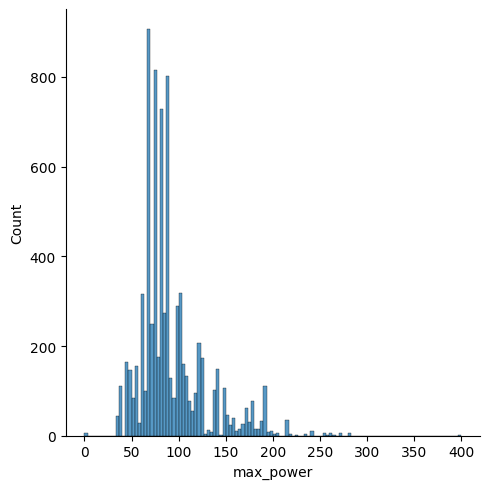

In [41]:
# plot the 'max_power' feature for considering the filling NULL value
sns.displot(data=df, x='max_power')

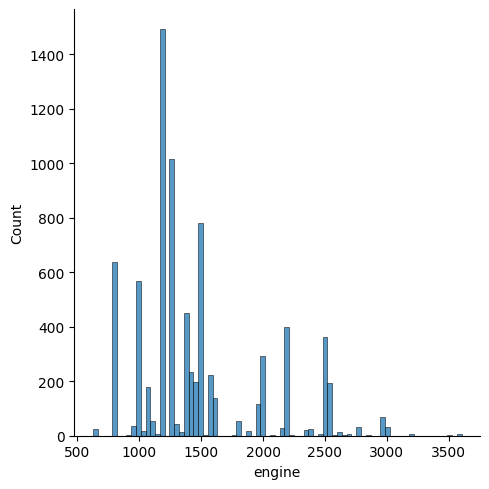

In [42]:
sns.displot(data=df, x='engine')

In [43]:

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

In [44]:
# Fill the testing set with X_train's median and mean
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [45]:
#Double check NULL value of all datasets
print(X_train.isna().sum(),"\n")
print(X_test.isna().sum(),"\n")
print(y_train.isna().sum())
print(y_test.isna().sum())

max_power    0
year         0
fuel         0
engine       0
dtype: int64 

max_power    0
year         0
fuel         0
engine       0
dtype: int64 

0
0


### 6.2 Cheking the Outliers
Outliers have a greatly effect with some algorithms, so the checking this element is also crucial.

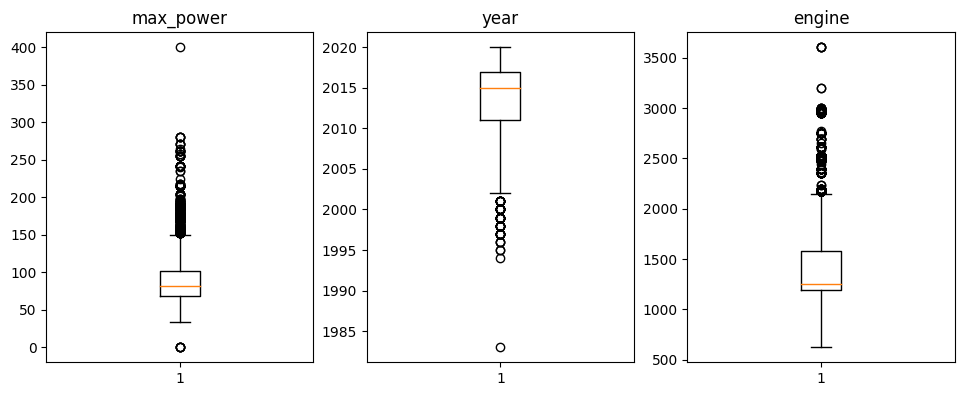

In [46]:
#Dict. of the features
feat_dict = {'max_power':1, 'year':2, 'engine':3}
#Plotting the box plot for outliers dectection in each feature
plt.figure(figsize=(20,30))
for item,i in feat_dict.items():
    plt.subplot(6,5,i)
    plt.boxplot(X_train[item])
    plt.title(item)

In [47]:
#Calculate the outliers 
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [48]:
#Loop the outlier functions
for col in X_train[['max_power','year','engine']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 471
Percent of data that is outlier: 7.33%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------engine---------------

Number of outliers: 946
Percent of data that is outlier: 14.73%


### 6.3 Scaling
Because the data has a different range of values, that can cause dominant features and effects to the predict model. To prevent the domination between them, the Robust scaling must be applied.

In [49]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [50]:
# one-hot encoder for y_train
y_train=pd.get_dummies(y_train)

In [51]:
# check shapes of all data set
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422, 4)
Shape of y_test:  (1606,)


In [52]:
# Check y_train and y_test
print(y_train.head())
print(y_test.head())

          0      1      2      3
5341   True  False  False  False
2300  False  False   True  False
5635   True  False  False  False
4934  False  False  False   True
6016  False   True  False  False
5354    1
2234    3
2936    2
7726    1
1739    2
Name: selling_price, dtype: int64


In [53]:

Y_train_encoded = pd.get_dummies(y_train)


In [54]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [55]:
Y_train_encoded

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       ...,
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

## 7. Modeling

### 7.1 Mlflow prepare
This assignment is using the Mlflow to manage modeling part. Mlflow is the open-source platform that use to manage the life-cycle of meachine learning run, which convinece for tracking every run in the assignment.

In [56]:
import mlflow, os
mlflow.set_tracking_uri("http://localhost:5000")
os.environ['LOGNAME']="ashmita-st124454"

### 7.2 Logistic Regression Class
The logistic regression class is created and integrated with mlflow library. Methods of Gradient Descent (Stochastic, Mini-Batch, Batch), Ridge Regression include with regularization, and classification scoring function were created for grid serch comparison.

In [57]:
class LogisticRegression:
    
    def __init__(self, regularization ,k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": self.k,
            "n": self.n,
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        #regularization
        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    #Accuracy 
    def accuracy(self,ytrue,yhat):
        correct_predictions= np.sum(1 for yt,yp in zip(ytrue,yhat) if yt==yp)
        total_predictions = len(yhat)   
        return correct_predictions/total_predictions
     
    # Precision
    def precision(self,ytrue, yhat,c):
        TP = np.nansum(np.logical_and(ytrue == c, yhat == c))
        FP = np.nansum(np.logical_and(ytrue != c, yhat == c))
        if (TP+FP) == 0:
            return 0
        else:
            return TP/(TP+FP)
    
    # Recall
    def recall(self,ytrue, yhat,c):
        TP = np.nansum(np.logical_and(ytrue == c, yhat == c))
        FN = np.nansum(np.logical_and(ytrue == c, yhat != c))
        if (TP+FN) == 0:
            return 0
        else:
            return TP/(TP+FN)

    # F1 score
    def f1_score(self, ytrue, yhat, c):
        rec=self.recall(ytrue, yhat, c)
        pre=self.precision(ytrue, yhat, c)
        if (rec + pre) == 0:
            f1 = 0
        else:
            f1 = (2 * pre * rec) / (rec + pre)
        return f1
    
    # Marcro precision
    def macro_precision(self,ytrue, yhat): 
        pre= [self.precision(ytrue, yhat, c) for c in range(self.k)]
        sumpre= np.sum(pre)
        return sumpre/self.k
    
    # Macro recall
    def macro_recall(self,ytrue, yhat): 
        recall= [self.recall(ytrue, yhat, c) for c in range(self.k)]
        sumrecall=np.sum(recall)
        return sumrecall/self.k
    
    # Macro f1 score
    def macro_f1_score(self,ytrue, yhat):
        f1=[self.f1_score(ytrue, yhat, c) for c in range(self.k)]
        sumf1= np.sum(f1)
        return sumf1/self.k
    
    
    # weighted precision (input precision of each class manually)
    def weighted_precision(self,ytrue, yhat):
        #add weight infront of each precision class
        pre_clist = [np.count_nonzero(ytrue ==c)/ len(yhat) * self.precision(ytrue, yhat, c) for c in range(self.k)]
        wp = np.sum(pre_clist) 
        return wp

    # weighted recall (input the list of True Positive and False Negative manually)
    def weighted_recall(self,ytrue, yhat):
        recalllist= [np.count_nonzero(ytrue ==c)/ len(yhat) * self.recall(ytrue, yhat, c) for c in range(self.k)]
        rp = np.sum(recalllist) 
        return  rp
    
    # weighted f1 score (input the list of precision and recall score manually)
    def weighted_f1_score(self,ytrue, yhat):
        f1list= [np.count_nonzero(ytrue ==c)/ len(yhat) * self.f1_score(ytrue, yhat, c) for c in range(self.k)]
        f1p = np.sum(f1list) 
        return  f1p

### 7.3 Ridge Logistic Regression 
Ridge Regression classes with regularization is created based on the logistic regression class (superclass).

In [58]:
class RidgePenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
        
class Ridge(LogisticRegression):
    def __init__(self,method, k, n , l, alpha=0.001, max_iter=5000):
        self.regularization = RidgePenalty(l)
        super().__init__(regularization=self.regularization, k=k,n=n, method=method,alpha=alpha, max_iter=max_iter)

class Normal(LogisticRegression):
    def __init__(self,method , k, n , l, alpha=0.001, max_iter=5000):
        self.regularization = RidgePenalty(0)
        super().__init__(regularization=self.regularization, k=k,n=n, method=method,alpha=alpha, max_iter=max_iter)

In [59]:
#helper function for looping classnames
import sys
def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

### 7.4 Checking before experiment
Simulated a situation in the purpose of class testing

In [60]:
from sklearn.metrics import classification_report
k=y_train.shape[1]
# Ridge regression
test = Ridge(l=0.1, k=y_train.shape[1], n=X_train.shape[1],method= "minibatch", max_iter=10000)
test.fit(X_train, y_train.values)
yhat = test.predict(X_test)
# Check through sklearn classification report
print("Sklearn's Classification report")
print(classification_report(y_test, yhat))

Loss at iteration 0 1.4248121844709392
Loss at iteration 500 0.7754201245399287
Loss at iteration 1000 0.8003271502958959
Loss at iteration 1500 0.8555305084382002
Loss at iteration 2000 0.7454527900981518
Loss at iteration 2500 0.7951685388272672
Loss at iteration 3000 0.8110734479772894
Loss at iteration 3500 0.772695703887596
Loss at iteration 4000 0.8221859950900485
Loss at iteration 4500 0.7688193316354132
Loss at iteration 5000 0.7880461676840074
Loss at iteration 5500 0.7987970122548059
Loss at iteration 6000 0.7832793632057998
Loss at iteration 6500 0.7830010176557411
Loss at iteration 7000 0.8184244604646289
Loss at iteration 7500 0.7845125665300327
Loss at iteration 8000 0.7785590555784694
Loss at iteration 8500 0.7635427142984288
Loss at iteration 9000 0.7711958528174175
Loss at iteration 9500 0.792992314675174
time taken: 1.4691672325134277
Sklearn's Classification report
              precision    recall  f1-score   support

           0       0.65      0.90      0.75     

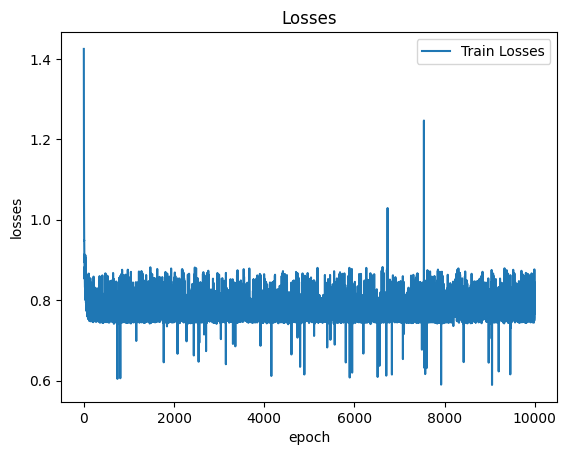

In [61]:
# plot the graph
test.plot()

## 8. Experiment

#### Ridge Regression - Grid Search
The grid search in logistic regression is created with all possibility to find the best logistic regression model.

In [62]:
mlflow.set_experiment(experiment_name="ashmita-st124454")
regression=["Normal", "Ridge"]
method = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
for reg in regression: 
    for met in method:
        for alpha in alphas:
            params = {"method": met, "l": 0.1,'alpha':alpha,"max_iter": 10000,"k":y_train.shape[1],"n":X_train.shape[1]}

            mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-l-{params['l']}-alpha-{params['alpha']}-max_iter{params['max_iter']}", nested=True)
                                
            print("-"*40)
            print(reg, "method:",met, 'alpha:',alpha, "max_iter:",10000)
            print("-"*40)

            # #######
            type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
            model = type_of_regression(**params) 
            model.fit(X_train, Y_train_encoded)
            
            yhat = model.predict(X_test)
            accuracy = model.accuracy(y_test, yhat)
            mar_pre=model.macro_precision(y_test,yhat)
            mar_rec=model.macro_recall(y_test,yhat)
            mar_f1=model.macro_f1_score(y_test,yhat)
            w_pre=model.weighted_precision(y_test,yhat)
            w_rec=model.weighted_recall(y_test,yhat)
            w_f1=model.weighted_f1_score(y_test,yhat)
            
            mlflow.log_metric(key="accuracy", value=accuracy)
            mlflow.log_metric(key="macro_precision", value=mar_pre)
            mlflow.log_metric(key="macro_recall", value=mar_rec)
            mlflow.log_metric(key="macro_f1_score", value=mar_f1)
            mlflow.log_metric(key="weighted_precision", value=w_pre)
            mlflow.log_metric(key="weighted_recall", value=w_rec)
            mlflow.log_metric(key="weighted_f1_score", value=w_f1)

            for c in range(y_train.shape[1]):
                precision = model.precision(y_test,yhat,c)
                mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                recall = model.recall(y_test,yhat,c)
                mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                f1 = model.f1_score(y_test, yhat, c)
                mlflow.log_metric(key=f"class_{c}_f1", value=f1)

            signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

            print("Sklearn's Classification report")
            print(classification_report(y_test, yhat))
            print("\n")


            
            mlflow.end_run()


----------------------------------------
Normal method: batch alpha: 0.01 max_iter: 10000
----------------------------------------
Loss at iteration 0 3.015534491090968
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
Loss at iteration 5000 nan
Loss at iteration 5500 nan
Loss at iteration 6000 nan
Loss at iteration 6500 nan
Loss at iteration 7000 nan
Loss at iteration 7500 nan
Loss at iteration 8000 nan
Loss at iteration 8500 nan
Loss at iteration 9000 nan
Loss at iteration 9500 nan
time taken: 2.997828960418701
Sklearn's Classification report
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       411
           1       0.00      0.00      0.00       420
           2       0.00      0.00      0.00       383
           3       0.00      0.00      0

## 9. Inference

In [63]:

import pickle

filename1='model/label_encoderA3.model'
pickle.dump(labelEncoder ,open(filename1,'wb'))

filename2='model/minmax_scalerA3.model'
pickle.dump(scaler ,open(filename2,'wb'))


In [64]:
# load the encoder and scaler
loaded_encoder = pickle.load(open(filename1, 'rb'))
loaded_scaler = pickle.load(open(filename2, 'rb'))

loaded_model= mlflow.pyfunc.load_model('runs:/8dafd1c72ff942e6baaeb1ff04a41afa/model')
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 8dafd1c72ff942e6baaeb1ff04a41afa

In [65]:
#sample data
df_original[['max_power','year','fuel','engine']].loc[2]

max_power      78.0
year           2006
fuel         Petrol
engine       1497.0
Name: 2, dtype: object

In [72]:
# Sample dataFrame
sample = pd.DataFrame([[78.0,2006.0, 'Petrol','1497.0']],
                      columns=['max_power','year','fuel','engine'])

# Label encoding 
sample['fuel'] = loaded_encoder.transform(sample['fuel'])
sample


,max_power,year,fuel,engine
0,78.0,2006.0,1,1497.0


In [73]:
scaled_sample  = loaded_scaler.transform(sample)

In [75]:
#Predicted the price by using loaded model from mlflow
predicted = loaded_model.predict(scaled_sample)
predicted

array([2])

In this assignment, the dataset was revisited with a different objective of classifying the predicted selling prices into four categories: 'Low price', 'Good price', 'Great price', and 'Expensive price'. 

To achieve this, Logistic Regression class was implemented and incorporated Ridge Regression. Feature selection involved utilizing a correlation matrix, predictive power score, and graphical representation to identify relevant features for model training. 

The chosen features include 'max_power', 'year', 'fuel', and 'engine'. Through a grid search and logging results into Mlflow, it was determined that the best-performing model is the Normal logistic model with batch gradient descent. The hyperparameters for this model were set to an alpha value of 0.001 and a maximum iteration value of 10000. This model achieved a satisfactory accuracy rate of 75.6 percent.